In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [21]:
# 1. Загрузите данные по вариантам в ноутбук.
# Мой вариант 5, всего вариантов 4 => мой вариант 1
path_to_excel = '/home/slagov/Documents/ml-labs/Вариант 1 fixed.xlsx'
df = pd.read_excel(path_to_excel, engine='openpyxl')
print(df.head())

     №  № школы Класс Пол  Номер варианта  Задания с кратким ответом  \
0  1.0    117.0    11   М           341.0  1+++--1+-++---0---------0   
1  2.0    148.0   12А   М           338.0  1+---+0--+---+0----++-+-0   
2  3.0    152.0    13   Ж           104.0  2-----0--+----1---------1   
3  4.0    152.0    13   М           104.0  1+--+-0++-----2----++---0   
4  5.0    132.0    11   М           337.0  1++---0-+++---1----+----2   

                      Задания с развёрнутым ответом Устная часть  \
0  0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)          NaN   
1  0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)          NaN   
2  0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1)          NaN   
3  0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)          NaN   
4  0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1)          NaN   

   Первичный балл  Балл  Минимальный балл  
0             8.0  20.0              24.0  
1             8.0  20.0              24.0  
2             9.0  22.0   

In [22]:
# 2. Сделайте описательную статистику полученных данных.
print(df.describe())

                 №      № школы  Номер варианта  Первичный балл         Балл  \
count  3048.000000  3048.000000     3048.000000     3048.000000  3049.000000   
mean   1524.500000   138.753281      340.787730       43.573491    72.769029   
std     880.026136    41.793413       39.077186        8.931816    13.662666   
min       1.000000   104.000000      101.000000        8.000000    20.000000   
25%     762.750000   126.000000      339.000000       38.000000    64.000000   
50%    1524.500000   144.000000      342.000000       45.000000    72.000000   
75%    2286.250000   148.000000      346.000000       50.000000    82.000000   
max    3048.000000  1106.000000      706.000000       58.000000   100.000000   

       Минимальный балл  
count            3048.0  
mean               24.0  
std                 0.0  
min                24.0  
25%                24.0  
50%                24.0  
75%                24.0  
max                24.0  


In [23]:
# 3. Найдите процент учащихся, выполнивших работу ниже среднего.
below_average_count = df[df['Балл'] < df['Балл'].mean()].shape[0]
percentage_below_average = (below_average_count / df.shape[0]) * 100
print(f'Процент учащихся, выполнивших работу ниже среднего: {percentage_below_average:.2f}%')

Процент учащихся, выполнивших работу ниже среднего: 51.30%


In [24]:
# 4. Найти процент учащихся не сдавших экзамен.
failed_count = df[df['Балл'] < df['Минимальный балл']].shape[0]
percentage_failed = (failed_count / df.shape[0]) * 100
print(f'Процент учащихся, не сдавших экзамен: {percentage_failed:.2f}%')

Процент учащихся, не сдавших экзамен: 0.13%


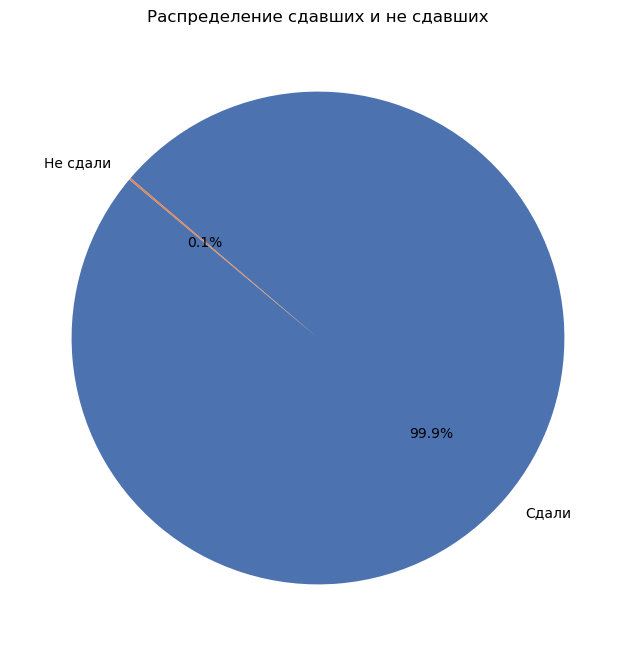

In [25]:
# 5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.
passed_count = df[df['Балл'] >= df['Минимальный балл']].shape[0]
failed_count = df[df['Балл'] < df['Минимальный балл']].shape[0]
labels = ['Сдали', 'Не сдали']
counts = [passed_count, failed_count]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep'))
plt.title('Распределение сдавших и не сдавших')
plt.show()

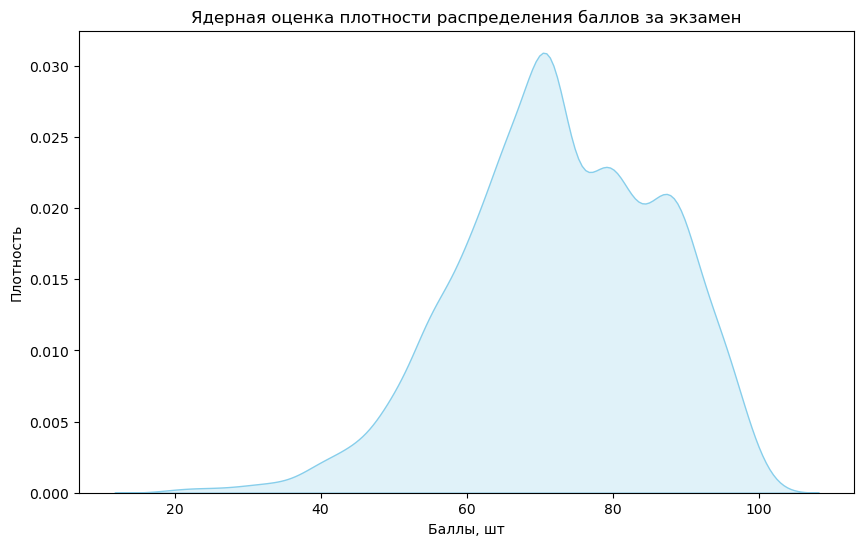

In [26]:
# 6. Постройте ядерную оценку плотности распределению баллов за экзамен.

plt.figure(figsize=(10, 6))
sns.kdeplot(df['Балл'], fill=True, color='skyblue')

plt.title('Ядерная оценка плотности распределения баллов за экзамен')
plt.xlabel('Баллы, шт')
plt.ylabel('Плотность')
plt.show()

In [27]:
# 7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

categories = ['Отл', 'Хор', 'Уд', 'Неуд']

# Добавление нового столбца с категориями оценок
df['Оценка'] = pd.cut(df['Балл'], bins=[-float('inf'), 39, 59, 79, float('inf')], labels=categories)
# Расчет процентного соотношения
grade_distribution = df['Оценка'].value_counts(normalize=True) * 100

print('Процентное соотношение учащихся по оценкам:', grade_distribution)

Процентное соотношение учащихся по оценкам: Оценка
Уд      49.098065
Неуд    34.962283
Хор     14.791735
Отл      1.147917
Name: proportion, dtype: float64


In [28]:
# 8. Какое процентное соотношение юношей и девушек писало данный экзамен?
gender_percentage = (df['Пол'].value_counts() / df.shape[0]) * 100
print('Процентное соотношение юношей и девушек, писавших экзамен: ', gender_percentage)

Процентное соотношение юношей и девушек, писавших экзамен:  Пол
Ж    57.953427
М    42.013775
Name: count, dtype: float64


In [29]:
# 9. Сколько школ принимало участие в экзамене?
print('Количество школ, принимавших участие в экзамене: ', df['№ школы'].nunique())

Количество школ, принимавших участие в экзамене:  24


In [30]:
# 10. Сколько всего заданий с кратким ответом? С развернутым ответом?
print(f"С кратким ответом: {len(df.loc[0, 'Задания с кратким ответом'])}")
print(f"С развёрнутым ответом: {df.loc[0, 'Задания с развёрнутым ответом'].count('(')}")

С кратким ответом: 25
С развёрнутым ответом: 12


In [31]:
# 11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: $В_1$, ... $В_к$ Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

df = df.dropna(subset=['Задания с кратким ответом'])

# Разбиваем задания на отдельные символы и преобразуем в DataFrame
answers_df = df['Задания с кратким ответом'].apply(lambda x: list(x))
print(answers_df)

# Преобразование списка строк в DataFrame, где каждый столбец соответствует заданию типа В
answers_df = pd.DataFrame(answers_df.tolist(), columns=[f'В_{i+1}' for i in range(answers_df.str.len().max())])
is_correct = answers_df.map(lambda x: x not in ['0', '-'])
print(is_correct)

percent_correct = is_correct.mean() * 100
results = pd.DataFrame({
    'Процент выполненных заданий': percent_correct,
    'Процент невыполненных заданий': 100 - percent_correct,
})

print(f"Процент выполненных и невыполненных заданий по каждому вопросу класса В:\n{results}")

0       [1, +, +, +, -, -, 1, +, -, +, +, -, -, -, 0, ...
1       [1, +, -, -, -, +, 0, -, -, +, -, -, -, +, 0, ...
2       [2, -, -, -, -, -, 0, -, -, +, -, -, -, -, 1, ...
3       [1, +, -, -, +, -, 0, +, +, -, -, -, -, -, 2, ...
4       [1, +, +, -, -, -, 0, -, +, +, +, -, -, -, 1, ...
                              ...                        
3043    [2, +, +, +, +, +, 5, +, +, +, +, +, +, +, 2, ...
3044    [2, +, +, +, +, +, 5, +, +, +, +, +, +, +, 2, ...
3045    [2, +, +, +, +, +, 5, +, +, +, +, +, +, +, 2, ...
3046    [2, +, +, +, +, +, 5, +, +, +, +, +, +, +, 2, ...
3047    [2, +, +, +, +, +, 5, +, +, +, +, +, +, +, 2, ...
Name: Задания с кратким ответом, Length: 3048, dtype: object
       В_1    В_2    В_3    В_4    В_5    В_6    В_7    В_8    В_9   В_10  \
0     True   True   True   True  False  False   True   True  False   True   
1     True   True  False  False  False   True  False  False  False   True   
2     True  False  False  False  False  False  False  False  False   T

In [32]:
# 12. Аналогично и с типом С (ответы с развернутым ответом)

# Удалим строки с пропущенными значениями в столбце "Задания с развёрнутым ответом"
df = df.dropna(subset=['Задания с развёрнутым ответом'])

def parse_extended_answers(answers):
    # Функция для разбора строки и получения списка результатов вида [0, 1, 0, ...]
    # Используем регулярное выражение для поиска всех элементов вида '0(число)' или '1(число)'
    parsed_answers = re.findall(r'(\d)\(\d\)', answers)
    return [int(a) for a in parsed_answers]  # Преобразуем в список целых чисел

# Применяем функцию к каждому значению в столбце и преобразуем в DataFrame
extended_answers_df = df['Задания с развёрнутым ответом'].apply(parse_extended_answers)
extended_answers_df = pd.DataFrame(extended_answers_df.tolist(),
                                   columns=[f'C_{i+1}' for i in range(extended_answers_df.str.len().max())])

is_correct_extended = extended_answers_df.map(lambda x: x == 1)

# Подсчет количества выполненных заданий для каждого вопроса типа С
percent_correct_extended = is_correct_extended.mean() * 100  # Процент выполненных

# Создание итоговой таблицы с результатами
results_extended = pd.DataFrame({
    'Процент выполненных заданий': percent_correct_extended,
    'Процент невыполненных заданий': 100 - percent_correct_extended,
})

print("Процент выполненных и невыполненных заданий по каждому вопросу класса С:")
print(results_extended)

Процент выполненных и невыполненных заданий по каждому вопросу класса С:
      Процент выполненных заданий  Процент невыполненных заданий
C_1                     96.751969                       3.248031
C_2                     13.090551                      86.909449
C_3                     94.455381                       5.544619
C_4                     10.761155                      89.238845
C_5                     29.166667                      70.833333
C_6                     71.751969                      28.248031
C_7                     12.565617                      87.434383
C_8                     19.586614                      80.413386
C_9                     52.132546                      47.867454
C_10                    59.448819                      40.551181
C_11                    97.998688                       2.001312
C_12                    84.547244                      15.452756


In [33]:
# 13. Сделайте анализ по двум школам:
#    1. по всем выполненным заданиям типа В
#    2. по заданиям типа С больше 50%
#    3. по среднему баллу юношей и девушек

df = pd.read_excel(path_to_excel, engine='openpyxl')

Анализ выполненных заданий типа В по школам:
               В_1        В_2        В_3        В_4        В_5        В_6  \
№ школы                                                                     
126      97.202797  90.209790  83.216783  79.020979  49.650350  82.517483   
152      98.187311  94.561934  84.894260  67.975831  55.589124  89.728097   

               В_7        В_8        В_9       В_10  ...       В_16  \
№ школы                                              ...              
126      95.104895  64.335664  79.720280  96.503497  ...  60.139860   
152      93.655589  75.528701  83.383686  95.468278  ...  66.163142   

              В_17       В_18       В_19       В_20       В_21       В_22  \
№ школы                                                                     
126      60.139860  67.832168  70.629371  83.916084  73.426573  39.860140   
152      57.099698  70.694864  64.954683  79.758308  67.673716  48.640483   

              В_23       В_24       В_25  
№ школы  

/tmp/ipykernel_22252/514072884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_schools['№ школы'] = df_selected_schools['№ школы'].astype(int)


<Figure size 800x600 with 0 Axes>

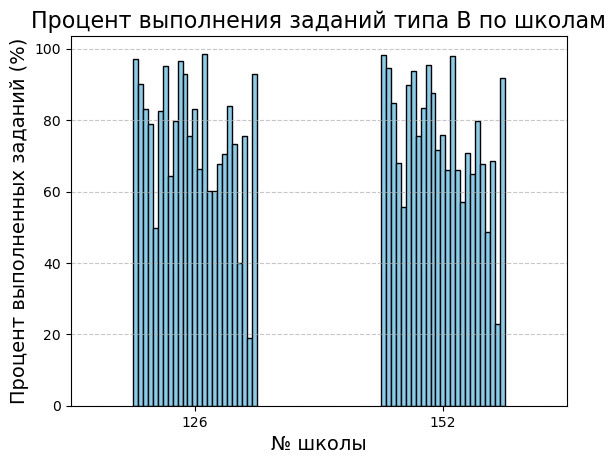

In [34]:
#    1. по всем выполненным заданиям типа В

school_ids = [152, 126]

# Фильтрация данных по двум школам
df_selected_schools = df[df['№ школы'].isin(school_ids)]
df_selected_schools['№ школы'] = df_selected_schools['№ школы'].astype(int)

def analyze_type_v(data):
    # Разбиваем задания на отдельные символы и преобразуем в DataFrame
    answers_df = data['Задания с кратким ответом'].apply(lambda x: list(x))
    answers_df = pd.DataFrame(answers_df.tolist(), columns=[f'В_{i+1}' for i in range(answers_df.str.len().max())])

    # Определение правил для выполненных и невыполненных заданий
    is_correct = answers_df.map(lambda x: x not in ['0', '-'])
    percent_correct = is_correct.mean() * 100
    return percent_correct

type_v_analysis = df_selected_schools.groupby('№ школы').apply(analyze_type_v)
print("Анализ выполненных заданий типа В по школам:")
print(type_v_analysis)

# Визуализация данных с помощью matplotlib
plt.figure(figsize=(8, 6))
type_v_analysis.plot(kind='bar', color='skyblue', edgecolor='black', legend=False)

# Добавление подписей и заголовков
plt.title('Процент выполнения заданий типа В по школам', fontsize=16)
plt.xlabel('№ школы', fontsize=14)
plt.ylabel('Процент выполненных заданий (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показ диаграммы
plt.show()


Анализ выполненных заданий типа С по школам (> 50%):
               C_1        C_3        C_6        C_9       C_10       C_11  \
№ школы                                                                     
126      94.405594  90.909091  77.622378  54.545455  59.440559  95.804196   
152      96.374622  93.353474  72.809668  56.797583  61.631420  97.885196   

              C_12  
№ школы             
126      83.216783  
152      84.592145  


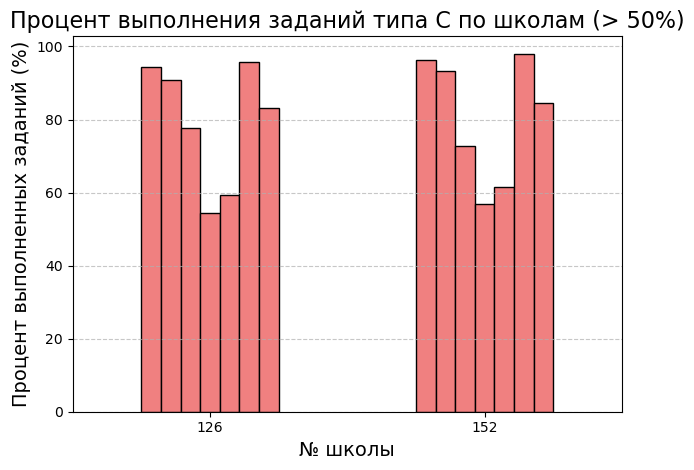

In [35]:
#    2. по заданиям типа С больше 50%
def analyze_type_c(data):
    # Функция для разбора строки и получения списка результатов вида [0, 1, 0, ...]
    def parse_extended_answers(answers):
        parsed_answers = re.findall(r'(\d)\(\d\)', answers)
        return [int(a) for a in parsed_answers]  # Преобразуем в список целых чисел

    # Применяем функцию к каждому значению в столбце и преобразуем в DataFrame
    extended_answers_df = data['Задания с развёрнутым ответом'].apply(parse_extended_answers)
    extended_answers_df = pd.DataFrame(extended_answers_df.tolist(),
                                       columns=[f'C_{i+1}' for i in range(extended_answers_df.str.len().max())])
    
    # Определение правил для выполненных и невыполненных заданий
    is_correct_extended = extended_answers_df.map(lambda x: x == 1)
    percent_correct_extended = is_correct_extended.mean() * 100

    # Определяем, в каких заданиях более 50% учеников выполнили задание
    more_than_50_percent = percent_correct_extended[percent_correct_extended > 50]
    return more_than_50_percent

type_c_analysis = df_selected_schools.groupby('№ школы').apply(analyze_type_c)
print("\nАнализ выполненных заданий типа С по школам (> 50%):")
print(type_c_analysis)


type_c_analysis.plot(kind='bar', color='lightcoral', edgecolor='black', legend=False)
plt.title('Процент выполнения заданий типа С по школам (> 50%)', fontsize=16)
plt.xlabel('№ школы', fontsize=14)
plt.ylabel('Процент выполненных заданий (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Средний балл юношей и девушек по школам:
Пол  № школы
Ж    126        71.617021
     152        73.302198
М    126        64.163265
     152        64.362416
Name: Балл, dtype: float64
Пол              Ж          М
№ школы                      
126      71.617021  64.163265
152      73.302198  64.362416


<Figure size 1000x600 with 0 Axes>

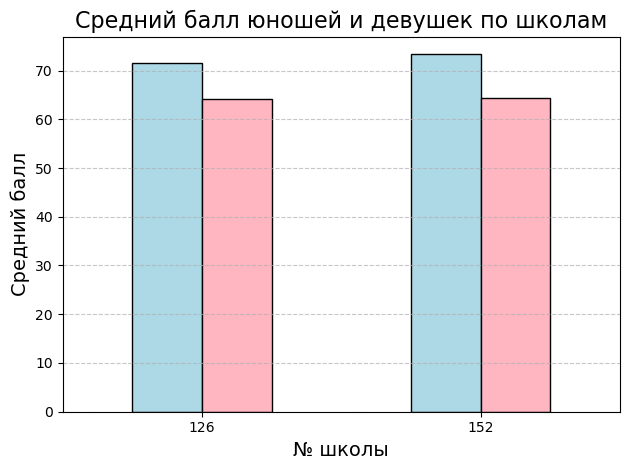

In [39]:
#    3. по среднему баллу юношей и девушек

gender_mean_scores = df_selected_schools.groupby(['Пол', '№ школы'])['Балл'].mean()
print("\nСредний балл юношей и девушек по школам:")
print(gender_mean_scores)

# Визуализация данных с помощью matplotlib
# Для этого нужно сначала преобразовать индекс MultiIndex в удобный формат для графика
gender_mean_scores = gender_mean_scores.unstack(level=0)  # Разворачиваем MultiIndex по уровню 'Пол'

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))

print(gender_mean_scores)
# Строим столбцы для каждой школы и для каждого пола
gender_mean_scores.plot(kind='bar', color=['lightblue', 'lightpink'], edgecolor='black', legend=False)

plt.title('Средний балл юношей и девушек по школам', fontsize=16)
plt.xlabel('№ школы', fontsize=14)
plt.ylabel('Средний балл', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()